<a href="https://colab.research.google.com/github/issa24/Data-Science/blob/main/D206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**D206 Performance Assessment**

  By Issa Abdulkadir

  06/06/2022	

   WGU

# Background

#Introduction

##Scenario: Telecommunications Churn
'In the telecommunications industry, customers can choose from multiple service providers 
and actively switch from one provider to another. Customer “churn” is defined as the 
percentage of customers who stopped using a provider’s product or service during a certain 
time frame. In this highly competitive market, some telecommunications industries can 
experience average annual churn rates as high as 25 percent. Given that it costs 10 times 
more to acquire a new customer than to retain an existing one, customer retention has now 
become even more important than customer acquisition.
For many providers, retaining highly profitable customers is the number one business goal. 
To reduce customer churn, telecommunications companies need to predict which customers 
are at high risk of churn. 
You are an analyst on a team of analysts in a popular telecommunications company, which 
serves customers in all regions of the United States. You have been asked to analyze the 
data set to explore the data, identify trends, and compare key metrics.'

**The excerpt extracted from the data dictionary file verbatim.



## Importing The Libraries and The Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)


In [ ]:
churn = pd.read_excel('/content/drive/MyDrive/churn_raw_data.xlsx')

In [ ]:
churn.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [ ]:
churn.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [ ]:
churn.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [ ]:
df = churn.label
df.head()

AttributeError: ignored

# **Part I: Research Question**
***A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.***

- Which customer demographic has the highest rate of churn?

***B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.***

 The dataset contains 52 columns of various data types and 10,000 rows. The dataset consist of both numerical and categorical variables. There are 24 columns that their data types are numerical (float and integer). The rest of the columns (28 out of 52) are of categorical (Yes or No) data types.
 
 The numerical data types fall under two classes of data- namely discrete and continuous data types. For example in this case of the variable in the dataset, the number of children is considered a discrete data type while the number of bandwith of internet usage in GB is considered a continuous data type.

 The categorical data are those data that are classified as nominal or ordinal. For example, the nominal data type in the dataset are the gender (male or female) and marital status variables. The oridinal data in the dataset can be the education variable. For example the education variable can ordered by the level of education a person possesses - from no education to doctorate degree level.


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

# **Part** II: **Data-Cleaning Plan**
***C.  Explain the plan for cleaning the data by doing the following:***

***1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.***

The first step I will be taking for cleaning the data is to check whether there are any missing values in the dataset. The second step is to check for the outliers and verify the outliers are either anomalies or the correct data entities.

***2.  Justify your approach for assessing the quality of the data, include:***

•  ***characteristics of the data being assessed***,

• ***the approach used to assess the quality.*** 

The methods to be used to discover missing values are various. In my case, I will use the graphical method to discover if the dataset is need of cleaning. Representing the variables in a graphical manner gives a quick and easy way to see where the missing values are most common. I will also use the percentage method to see if what percentage of the data comprises of the missing values. Knowing this would provide a better understanding in how to approach the missing values.

Also the same approach is repeated for finding the outliers that might exist in the dataset. I will be using the graphs in particular the boxplots to show the outliers in each variable. This is justified because the boxplots succintly dispaly all the data ranges from the first quartile via median, and to the third quartile. Anything that falls outside of the first and third quartiles are considered the outliers.

***3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.***

The programming language to be used is Python. Python has a lot of useful scientific libraries for data analysis such as pandas, NumPy , matplotlib and much more. It’s an easy programming language to learn and its widely in the data science community.


***4.  Provide the code you will use to identify the anomalies in the data.***

The code below will identify the anomalies(missing values and outliers) in the data both graphical and non-graphical methods.

### The Missing Values
First let's look at the missing values that reside in the variables of the  dataset. The code below will uncover the missing values.
 

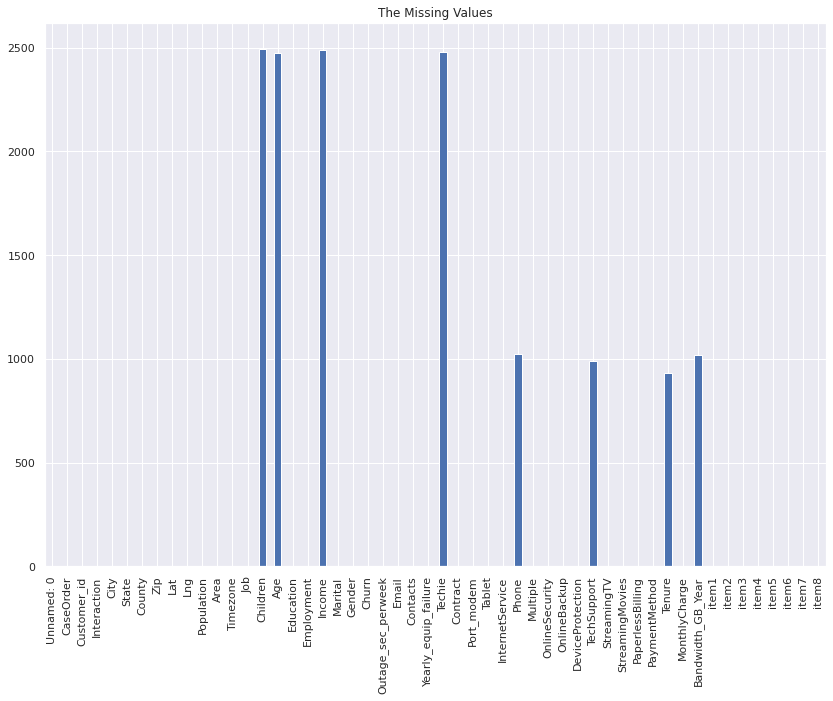

In [ ]:
# Visualizing the missing values
churn.isna().sum().plot.bar(title= 'The Missing Values',figsize=(14, 10))
plt.show()

In [ ]:
# Finding the missing values
churn.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [ ]:
# The variables with the largest missing values are identified
[columns for columns in churn.columns if churn[columns].isna().sum() > 900]

['Children',
 'Age',
 'Income',
 'Techie',
 'Phone',
 'TechSupport',
 'Tenure',
 'Bandwidth_GB_Year']

In [ ]:
# The categorical variables filtered to check the missing values
df1= churn.select_dtypes(include=['object'])
df1.head()
df1.isna().sum()

Customer_id            0
Interaction            0
City                   0
State                  0
County                 0
Area                   0
Timezone               0
Job                    0
Education              0
Employment             0
Marital                0
Gender                 0
Churn                  0
Techie              2477
Contract               0
Port_modem             0
Tablet                 0
InternetService        0
Phone               1026
Multiple               0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport          991
StreamingTV            0
StreamingMovies        0
PaperlessBilling       0
PaymentMethod          0
dtype: int64

In [ ]:
df1['Phone'] = df1['Phone'].fillna(df1['Phone'].mode()[0])

In [ ]:
df1['Techie'] = df1['Techie'].fillna(df1['Techie'].mode()[0])

In [ ]:
df1['TechSupport'] = df1['TechSupport'].fillna(df1['TechSupport'].mode()[0])

In [ ]:
df1.isna().sum()

Customer_id         0
Interaction         0
City                0
State               0
County              0
Area                0
Timezone            0
Job                 0
Education           0
Employment          0
Marital             0
Gender              0
Churn               0
Techie              0
Contract            0
Port_modem          0
Tablet              0
InternetService     0
Phone               0
Multiple            0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
dtype: int64

In [ ]:
# Creating a function that calculates the percentage of missing values in each variable.
def count_percentage(x):
  perc_miss = x.isna().sum() / len(x) *100
  return perc_miss
num_row = 7 
print('The Percentage of Missing Values in Each Variable:')
print('*'*50)
print('*Children:',count_percentage(churn['Children']))
print('*Age:',count_percentage(churn['Age']))
print('*Income:',count_percentage(churn['Income']))
print('*Techie:',count_percentage(churn['Techie']))
print('*Tenure:',count_percentage(churn['Tenure']))
print('*TechSupport:',count_percentage(churn['TechSupport']))
print('*Bandwith:',count_percentage(churn['Bandwidth_GB_Year']))
print('**********' *5)

The Percentage of Missing Values in Each Variable:
**************************************************
*Children: 24.95
*Age: 24.75
*Income: 24.9
*Techie: 24.77
*Tenure: 9.31
*TechSupport: 9.91
*Bandwith: 10.209999999999999
**************************************************


### The Outliers Detection
There are many ways to find outliers in the dataset. I planned to use a visualization method in detecting outliers because visualization is a quick approach to see how data points are depicted in the overall dataset. Outliers will be investigated using a visualization method called a boxplot method. The way a boxplot works is that it arranges data points  into three distinct points: *the upper quartile, the median, the lower quartile*. Any points that fall out of that range are considered outliers. To find outliers, all the numerical variables in the dataset will be used because categorical variables are not suited for this type of outlier detection method (explanation for this reason is beyond the scope of this project).

To demonstrate the method described above, using the code below, the boxplots for all the numerical variables will be generated to visualize the outliers within the variables.

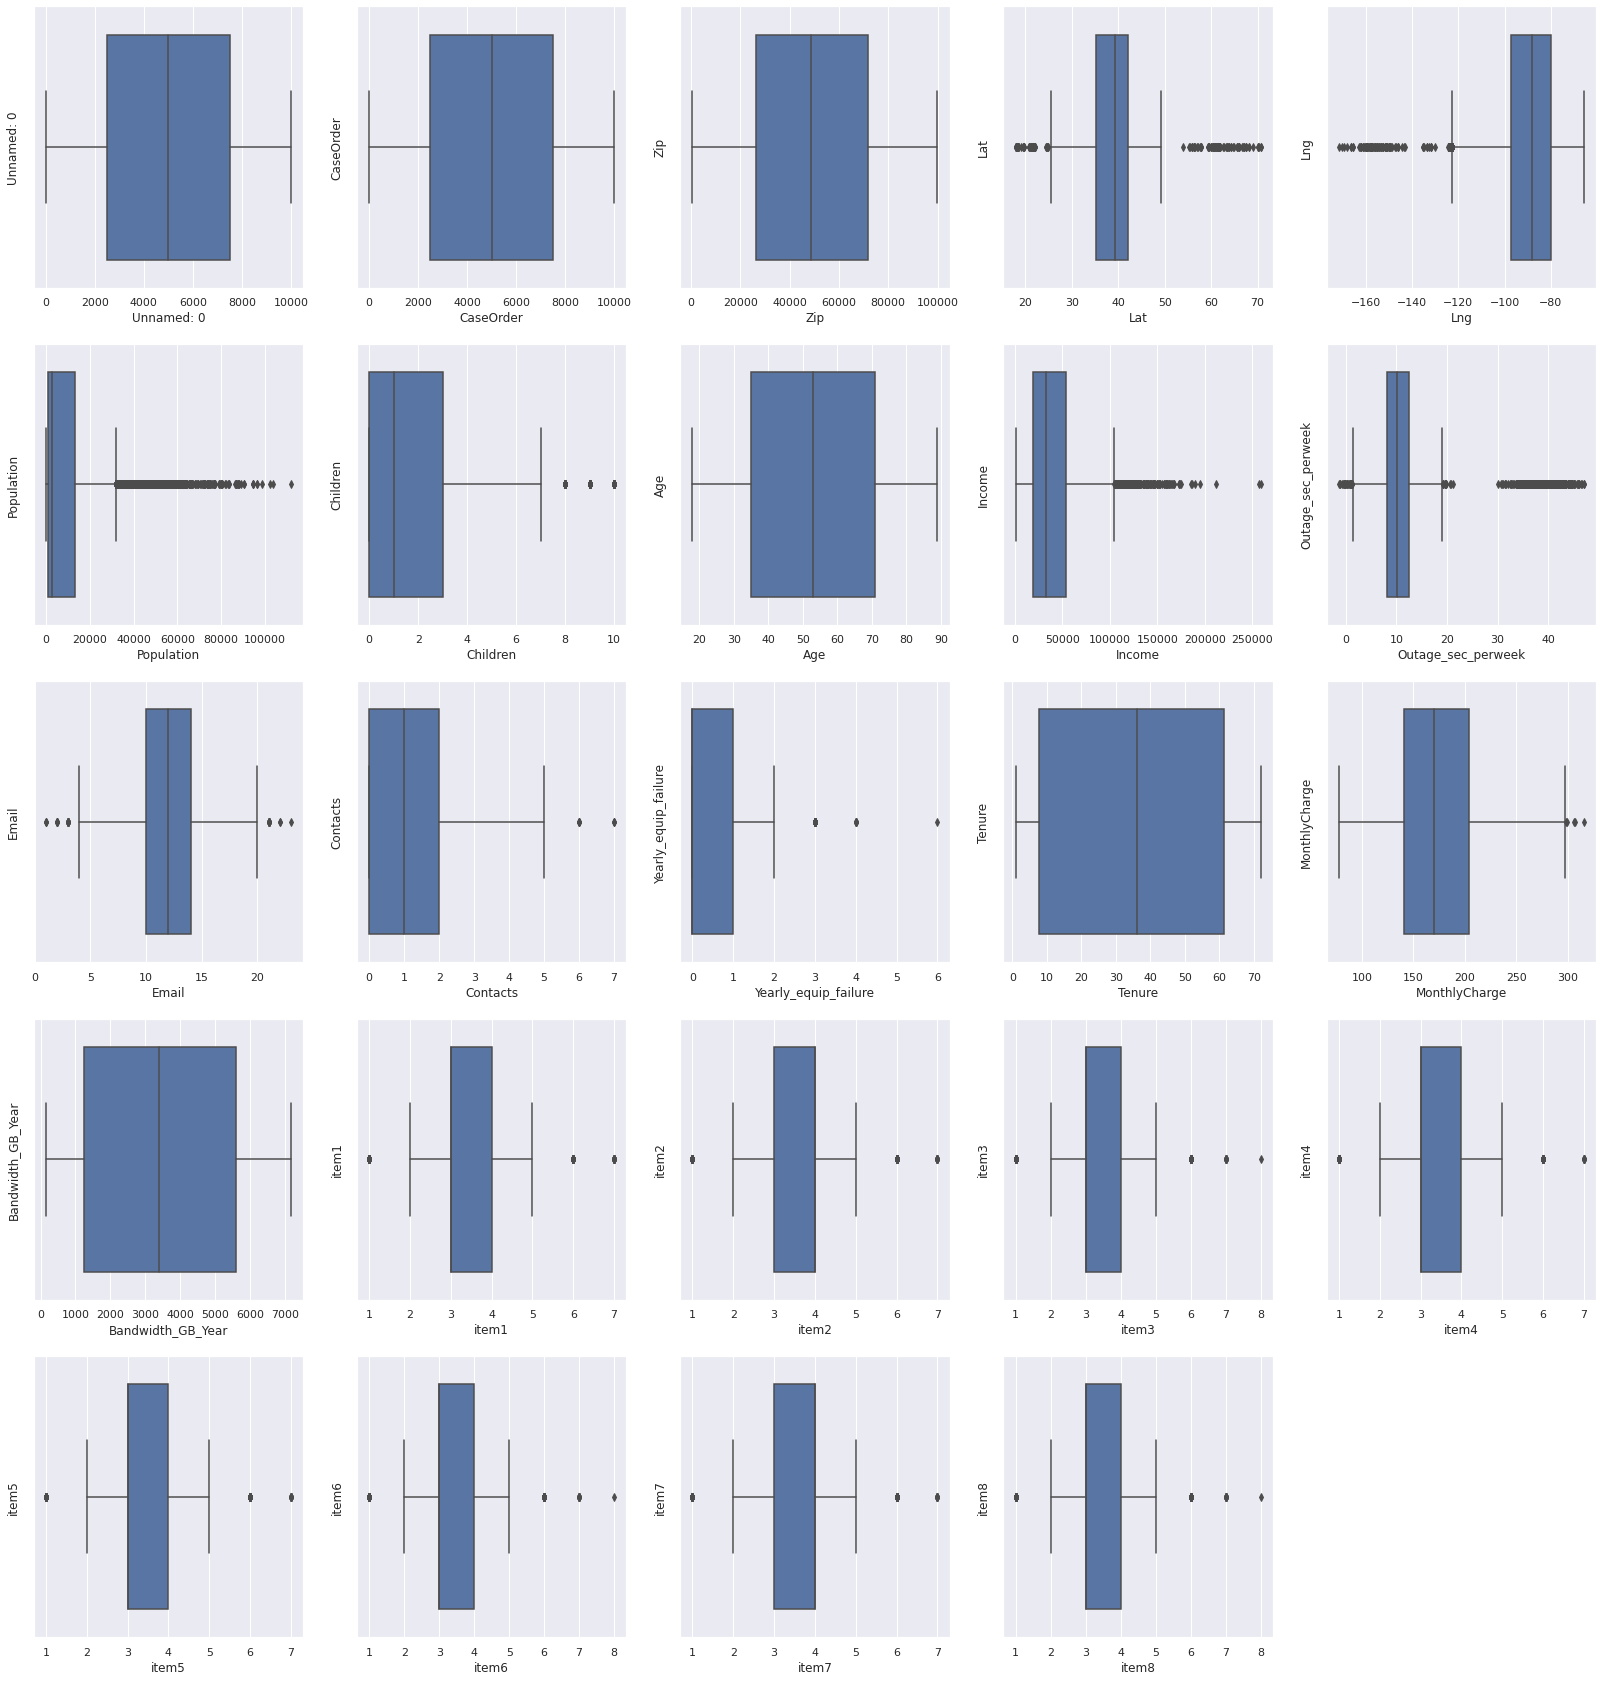

In [ ]:
num_cols = churn.select_dtypes(include = np.number)
plt.figure(figsize=(28,30))
for i,col in enumerate(num_cols,1):
  plt.subplot(5,5,i)
  sns.boxplot(churn[col])
  plt.ylabel(col)

     
plt.show()

# **Part III: Data Cleaning**
D.  Summarize the data-cleaning process by doing the following:

During the process of looking for anomalies in the dataset, I discovered some variables have a lot of missing values. Out of 52 variables, 8 variables have missing values that need to be cleaned.
The process of cleaning the missing values varies by the dataset. There are many methods to be used to deal with the anomalies found in the dataset. One such mitigation process is by using the mean or the median of the values in the variables to fill the missing values. Using this method will keep all the values in the dataset and negate the need to delete the missing values. In some cases, deleting the missing values are necessary to make the outcome of our analysis sound. 

At the same time, some missing values are there for various reasons such as there are no available information for the variables and therefore nothing can be done except to leave them blank. As we navigate through the dataset, we must develop and make sense of the context of the data available to us.
The outcome of implementing the imputation methods can be deduced from the results achieved after the implementation of the median method of imputation. First, the missing values found in the variables disappeared. Second, the statistical summaries of the variables changed as expected.


## Creating a copy of cleaned dataset

In [ ]:
churn_cleaned = churn

# Dealing with the Missing Values
There are a few ways to deal with the missing values. Namely using the central tendency method (mean, median, mode) or deleting the missing values or leave the data interact. 

In the case of churn data, the central tendency method will be used to deal the missing values. I will specifically use the median method in dealing with the missing values.

## 4.  Provide the code used to mitigate anomalies.
## Numerical Variables Missing Values Elimination Method
First step is to create a function that fills in the missing values with the median data. This step deals only with numerical variables in the dataset. The code shows the process of eliminating  the missing values using the median method.



In [ ]:
churn_cleaned['Children'].fillna(churn_cleaned['Children'].median(), inplace=True)


In [ ]:
churn_cleaned['Age'].fillna(churn_cleaned['Age'].mean(), inplace=True)


In [ ]:
churn_cleaned['Income'].fillna(churn_cleaned['Income'].median(), inplace=True)


In [ ]:
churn_cleaned['Tenure'].fillna(churn_cleaned['Tenure'].median(), inplace=True)


In [ ]:
churn_cleaned['Bandwidth_GB_Year'] = churn_cleaned['Bandwidth_GB_Year'].fillna(churn_cleaned['Bandwidth_GB_Year'].median())

The charts below show the changes that use of median to fill in the missing values brought about. As indicated below some graphs drastically shifted accordingly.

In [ ]:
# churn_cleaned.hist(figsize=(14,14))
# plt.show()

The result of using median to fill in the missing values for numerical variables only is shown below graphically. As the graph show, there are no longer missing values for the numerical variables.

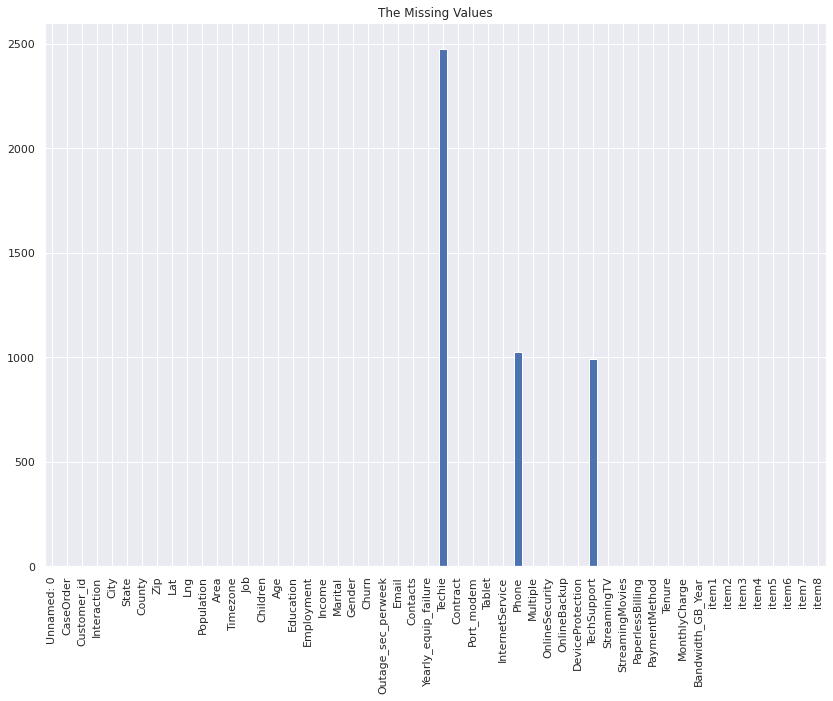

In [ ]:
# The result of using median to fill in the missing values. Note how the categorical variables still show the missing values.
churn_cleaned.isna().sum().plot.bar(title= 'The Missing Values',figsize=(14, 10))
plt.show()

## Categorical Variables Missing Values Elimination Method
For the categorical variables , the mode method is used to get of the missing values. The code below shows how it is done.

In [ ]:
churn_cleaned['Techie'] = churn_cleaned['Techie'].fillna(churn_cleaned['Techie'].mode()[0])
churn_cleaned['Phone'] = churn_cleaned['Phone'].fillna(churn_cleaned['Phone'].mode()[0])
churn_cleaned['TechSupport'] = churn_cleaned['TechSupport'].fillna(churn_cleaned['TechSupport'].mode()[0])

In [ ]:
churn_cleaned.isna().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [ ]:
churn_cleaned.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,1.822500,53.275748,38256.017897,11.452955,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,1.925971,18.003063,24747.872761,7.025921,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.275748,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


churn_cleaned.hist()

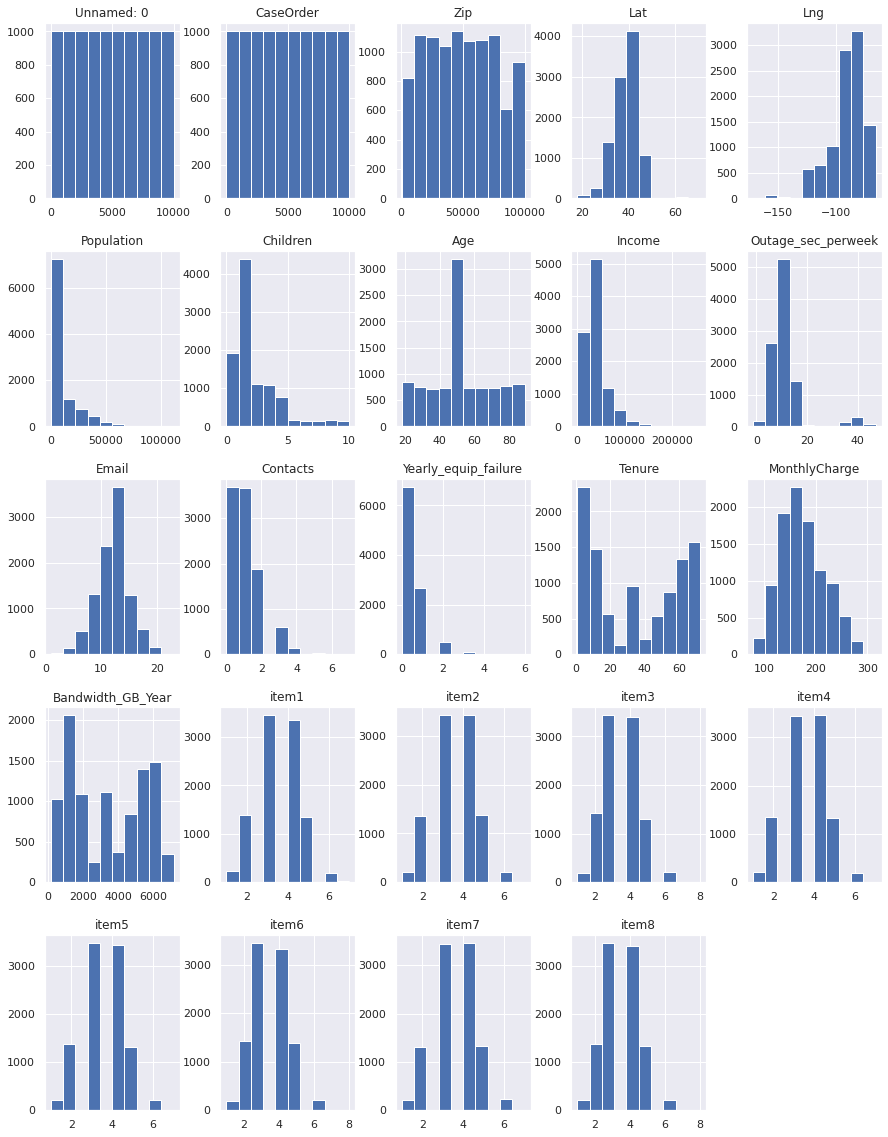

In [ ]:
churn_cleaned.hist(figsize=(15,20))
plt.show()

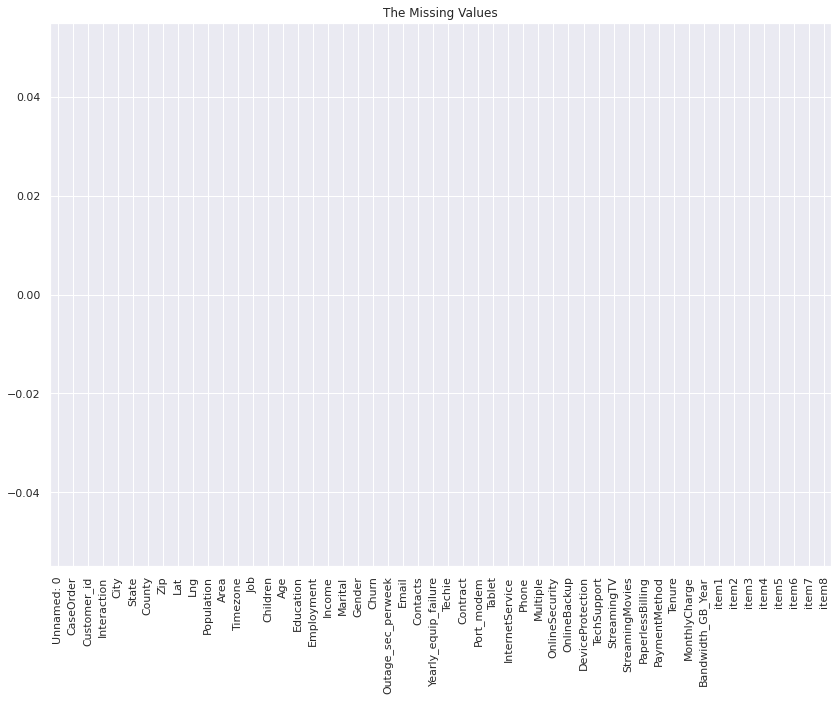

In [ ]:
# The graph below shows the result of treating missing values with the central tendency methods.
churn_cleaned.isna().sum().plot.bar(title= 'The Missing Values',figsize=(14, 10))
plt.show()

## Outliers Treatment Methods


 To find the outliers in the dataset, the first step is to use visualiztion methods for easily detecting the extreme data points. I used a boxplot method to find the outliers in each variable. Please see the above graphs in the section named "The Outliers Detection".   Since the dataset is small compared millions of customers that the telecom company has in reality, it's better to treat the outliers in the dataset by retaining them instead of averaging or using a median approach. This gives us a general idea of how the customers tend to choose the services the telecom company provides without taking into consideration the effects  of the outliers.

## 5.  Provide a copy of the cleaned data set.

The code below created a copy of cleaned dataset attached to this report at the time of submission.

In [ ]:
cleaned_churn = churn_cleaned.to_csv('cleaned_churn.csv')

## 6.  Summarize the limitations of the data-cleaning process.

The size of the dataset, especially the column size is way more difficult to deal with. With missing values lurking everywhere in the data, it became insurmountable in navigating and finding appropriate solutions to combat the problems. On the other hand there are plenty of variables that have outliers which created a dilemma of wether to impute or remove them all together. In my case I kept the outliers because of the size of the dataset.
## 7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

With a lot of missing data, it’s hard to make conclusive decisions based on the available dataset. This poses a huge risk as the processes of data collection were not properly followed or documented. This limitation imposes difficulties in using the insights driven from the analysis of the dataset as there are also outliers that could skew the interpretation of the analysis. Abundance cautions must be taken to avoid erroneous conclusions.

E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.


  * item1
  * Bandwidth_GB_Year
  * item5
  * Outage_sec_perweek
  * Children
  * Yearly_equip_failure
  * Income





 



**2.  Describe how you identified the principal components of the data set.**
# Principal Components Analysis 
The purpose of Principal Components Analysis is to reduce features in the dataset to its basic important components:that means if the variables have strong correlations among themselves, it is necessary to remove some of the variables as they provide no significant insights in identifying the key variables playing crucial roles.

To efficiently and accurately use the PCA method, the following factors must be implemented:


*   The dataset must be free of missing values
*   There should be no outliers
*   No categorical variables allowed
*   The features to be considered for PCA should have strong correlations


Before listing the principal components in the dataset, requirements above must be met and further steps needed in finding the principal components for the dataset. The first step is to select only  the numerical variables of the dataset. Next  is to normalized the variables so  that no one variable has a bigger impact on the overall variables. This is done using the Z-score method where the mean of the data is substracted from the individual variable and then divide them by the standard deviation of the data.

Once our dataset is normalized, the next step is to use the principal component analysis(PCA) from the Python libray. Using the scaled data, the PCA's fit method is used to get the components with no correlations.

## Criteria Used
The principal components selected are based on the Kaisure rule- the rule says that the principal components above eigenvalue of 1 or higher are the best candidates for PCA. In the dataset, there are 7 variable that satisfy the Kaisure rule.

**3.  Describe how the organization can benefit from the results of the PCA**

The organization will greatly benefit from this approach because the unnecessary features of the dataset can be reduced and efficiency of the dataset can be increased to find hidden insights for well-informed decision making.

# The Implementation of PCA using Python's Libraries
Using one of the widely used Python's data science library called *sklearn*, the PCA method is used to find the principal components in the dataset. In the following section the process of applying PCA is demonstrated using the coding methods.

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_churn = churn_cleaned[['Children', 'Age','Income','Tenure','Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure','MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8']]

scaler = StandardScaler()
scaler.fit(numeric_churn)
scaled_churn = scaler.transform(numeric_churn)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=scaled_churn.shape[1])
pca.fit(scaled_churn)

PCA(n_components=18)

In [ ]:
print(scaled_churn.shape)


(10000, 18)


In [ ]:
pca.components_

array([[ 3.55254518e-04,  5.04438832e-03, -8.42925181e-04,
        -1.07122865e-02, -1.31507689e-02,  8.65835312e-03,
        -8.56984510e-03, -7.71803019e-03, -5.40205810e-04,
        -1.26164544e-02,  4.58791160e-01,  4.34077734e-01,
         4.00756635e-01,  1.45672792e-01, -1.75524286e-01,
         4.05061752e-01,  3.58265342e-01,  3.08774146e-01],
       [-1.20225994e-03, -1.33505493e-02,  8.07807095e-03,
         7.01111007e-01,  1.85085906e-02, -2.12497920e-02,
         3.73293251e-03,  1.59799566e-02,  4.34885464e-02,
         7.02815859e-01,  3.19740665e-02,  4.28640684e-02,
         3.45514600e-02, -4.98552071e-02,  6.57231613e-02,
        -1.20572679e-02, -3.44760853e-03, -1.66675003e-02],
       [ 1.00356067e-02, -1.72046413e-02,  2.40666458e-02,
        -7.09771610e-02, -4.73210298e-02, -4.59698037e-03,
        -1.07525617e-02,  7.13000310e-03, -2.43212875e-02,
        -7.32039194e-02,  2.80199241e-01,  2.81430965e-01,
         2.80844735e-01, -5.67161882e-01,  5.86047306e

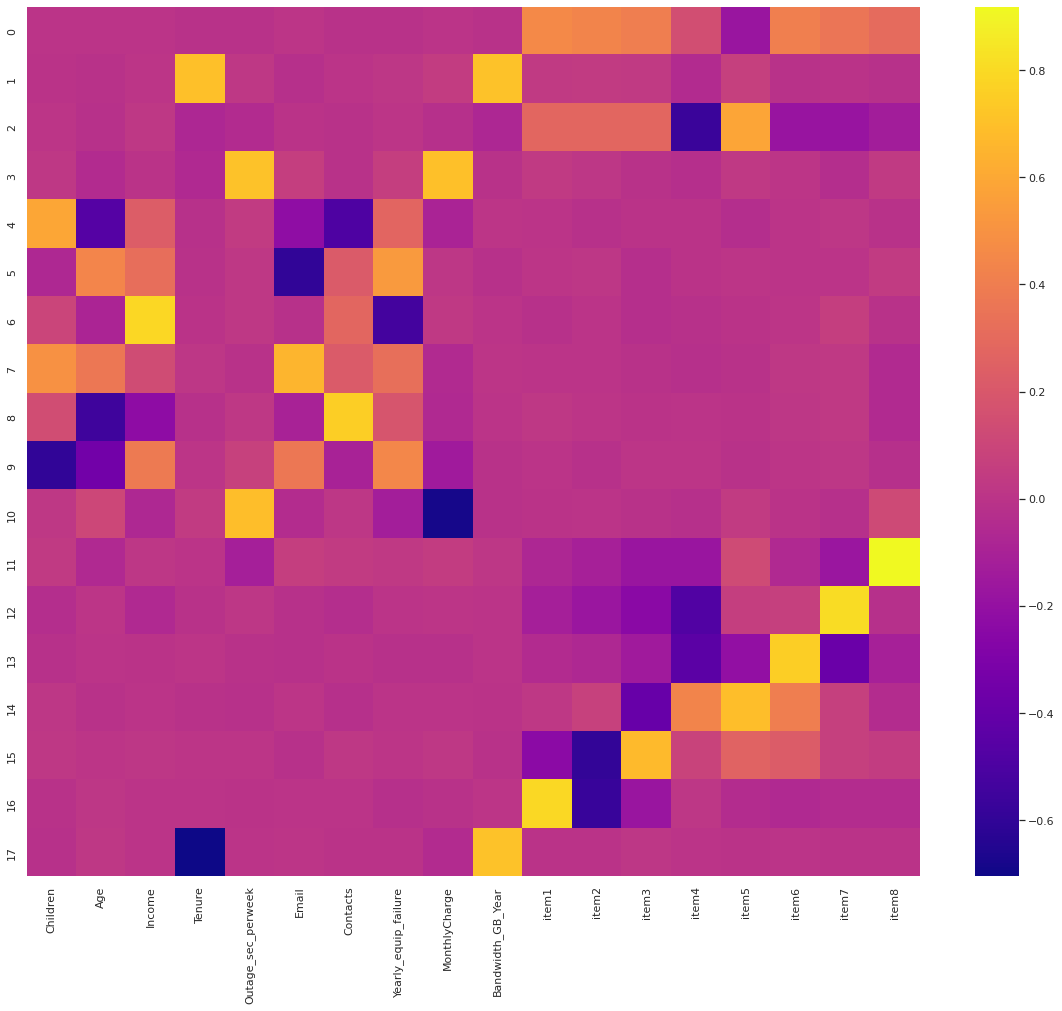

In [ ]:
churn_comp = pd.DataFrame(pca.components_, columns=numeric_churn.columns)
plt.figure(figsize=(20,16))
sns.heatmap(churn_comp, cmap='plasma')

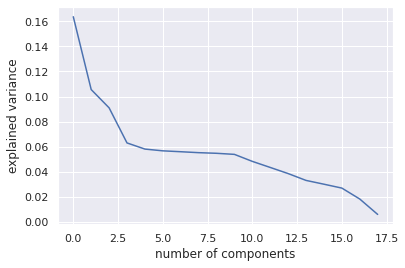

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [ ]:
ldgs = pd.DataFrame(pca.components_.T, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                 'PC11','PC12', 'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
                    index=numeric_churn.columns)
ldgs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Children,0.000355,-0.001202,0.010036,0.019972,0.594961,-0.064791,0.097023,0.498771,0.143781,-0.598888,0.018329,0.031660,-0.035826,-0.016346,0.012283,0.018736,-0.008487,-0.018251
Age,0.005044,-0.013351,-0.017205,-0.047302,-0.464332,0.440885,-0.086758,0.372894,-0.550288,-0.347862,0.109017,-0.062799,0.010081,-0.000984,-0.012200,0.008498,0.016000,0.021660
Income,-0.000843,0.008078,0.024067,-0.002073,0.228620,0.318923,0.787546,0.136449,-0.227324,0.382173,-0.069396,0.012564,-0.059747,-0.004884,0.000470,0.014156,0.004811,0.001411
Tenure,-0.010712,0.701111,-0.070977,-0.058467,-0.017387,-0.010590,-0.003727,0.012996,-0.019236,0.007879,0.038043,0.000700,-0.010020,0.007494,-0.012133,0.006354,0.005125,-0.705000
Outage_sec_perweek,-0.013151,0.018509,-0.047321,0.704334,0.038326,0.022564,0.019106,-0.010187,0.021510,0.072582,0.691573,-0.118354,0.012144,-0.011747,-0.016851,0.010543,-0.004299,0.000868
Email,0.008658,-0.021250,-0.004597,0.059848,-0.221158,-0.602841,-0.019169,0.655794,-0.102504,0.368780,-0.042927,0.061748,-0.016696,-0.017155,0.007270,-0.017093,0.001017,0.005382
Contacts,-0.008570,0.003733,-0.010753,-0.009403,-0.490556,0.219885,0.279984,0.217086,0.755792,-0.099017,0.017038,0.037870,-0.036325,-0.003903,-0.025966,0.020714,-0.000877,-0.002648
Yearly_equip_failure,-0.007718,0.015980,0.007130,0.059128,0.274208,0.532851,-0.527463,0.328432,0.184500,0.447727,-0.121722,0.029648,0.004701,-0.014889,-0.000838,0.007000,-0.020949,-0.002405
MonthlyCharge,-0.000540,0.043489,-0.024321,0.696744,-0.096036,0.015092,0.026887,-0.055530,-0.059249,-0.146578,-0.684187,0.049609,0.009534,-0.014265,0.000850,0.021172,-0.013126,-0.048200
Bandwidth_GB_Year,-0.012616,0.702816,-0.073204,-0.009570,0.005994,-0.017203,0.002100,0.007581,0.002275,-0.009765,-0.011588,0.013014,0.002324,0.003455,-0.001503,-0.007909,0.007116,0.706760


In [ ]:
cov_matrix = np.dot(scaled_churn.T, scaled_churn)/numeric_churn.shape[0]
cov_matrix

array([[ 1.00000000e+00, -1.90688477e-02,  1.28945011e-02,
        -1.33270218e-02,  3.08588675e-03, -4.56479203e-04,
        -1.84545778e-02,  1.31827669e-02, -3.09595073e-03,
         1.03676696e-02,  7.76406073e-03,  1.83451498e-03,
        -5.43402497e-03, -1.34618167e-02, -5.98419114e-03,
         6.38421145e-04,  5.82442898e-03, -9.20330002e-03],
       [-1.90688477e-02,  1.00000000e+00,  2.29072442e-04,
         5.78321097e-03, -1.56321341e-02,  2.41542378e-03,
         1.71921638e-02,  6.52094276e-03,  6.97934780e-03,
        -2.15172747e-02, -6.81817063e-03,  9.10344452e-03,
        -4.64551863e-03,  9.69207560e-03, -4.16596083e-03,
         7.54126431e-03,  1.76463853e-03,  1.55680795e-02],
       [ 1.28945011e-02,  2.29072442e-04,  1.00000000e+00,
         4.61659753e-03,  5.89547453e-03, -1.25836746e-02,
         6.53979551e-04, -2.56321124e-03, -5.71816234e-03,
         3.14893148e-03,  9.08321073e-04,  7.25452868e-03,
        -5.39696278e-03, -1.96888592e-02,  8.27489611e

In [ ]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.947981984688364,
 1.8998716941023135,
 1.636808208311066,
 1.1317718058153583,
 1.0433706303134138,
 1.018065453431424,
 1.0052198418294203,
 0.991694850916235,
 0.9826063130854055,
 0.9671048298378784,
 0.8663262339825137,
 0.7788699343527825,
 0.6908431657957038,
 0.5923468617640912,
 0.5377469849297772,
 0.48183413445502776,
 0.32461709114197346,
 0.10291998124725896]

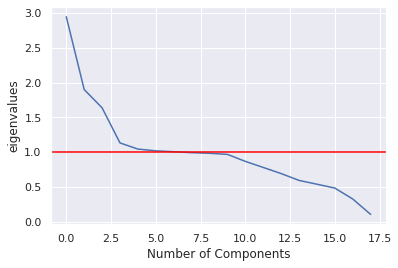

In [ ]:
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [ ]:
pca_selected = len([i for i in eigenvalues if i > 1])

pca_selected

7

In [ ]:
selected_PCs = {}
for i in ldgs.columns[:7]:
    selected_PCs[i] = str(ldgs.index[ldgs[i] == max(ldgs[i])].tolist())[2:-2]

print(str(selected_PCs)[1:-1].replace(', ','\n'))

'PC1': 'item1'
'PC2': 'Bandwidth_GB_Year'
'PC3': 'item5'
'PC4': 'Outage_sec_perweek'
'PC5': 'Children'
'PC6': 'Yearly_equip_failure'
'PC7': 'Income'


# Part IV. Supporting Documents



F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5a0c84ca-77db-41a7-a5a1-aeb20098899e


G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.
 
    References used are based on the course webinars.

H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

       No in-text citations used.

I.  Demonstrate professional communication in the content and presentation of your submission.